In [ ]:

!gdown https://drive.google.com/uc?id=1O4Iuaf7JIwuDMivInLXNjWrBsBYoujPw

Downloading...
From: https://drive.google.com/uc?id=1O4Iuaf7JIwuDMivInLXNjWrBsBYoujPw
To: /content/Walmart.csv
100% 23.0M/23.0M [00:00<00:00, 59.4MB/s]


#About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


#Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



#How to address and spending habits differ between male and female customers?

###1)To address and spending habits differ between male and female customers, Companies need to predict which customers are at high indulgence of sales or who buy more.

###2)To detect early signs of potential sales, insight generation of customers and their interactions across numerous channels, including store visits, product purchase history, customer service calls, Web-based transactions, and social media interaction.

###3)By providing solution for Sales fluctuation, businesses can preserve their market position,and also grow and thrive with more customers network, the lower the cost of initiation and the larger the profit.





#Objectives in this Analysis


####Objective is to find solutions and suggestions for any possible upliftment in the sales trend and volume between the Male and Female

###1)What is the percentage of Customers who are with the active services of purchase ?
###2)Does gender play a role in Purchase or Sales activity of a Company ?
###3)Does the type of service provided leads to more/less Purchase?
###4)What's the most profitable region in between the two genders?
###5)Profitable features and services by the company?

# Loading libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Walmart.csv")

# Data Inspection Or Checking the Data

In [ ]:
df.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Checking for the null values

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


#There are no null values in the data set

#Statistical Analysis of the Data

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df["Purchase"].mean()

9263.968712959126

In [ ]:
df[["Purchase", "Age"]].groupby("Age").mean()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [ ]:
df[["Purchase", "Age"]].groupby("Age").median()

,Purchase
Age,
0-17,7986.0
18-25,8027.0
26-35,8030.0
36-45,8061.0
46-50,8036.0
51-55,8130.0
55+,8105.5


In [ ]:
df[["Purchase", "Age"]].groupby("Age").max()

,Purchase
Age,
0-17,23955
18-25,23958
26-35,23961
36-45,23960
46-50,23960
51-55,23960
55+,23960


In [ ]:
df[["Purchase", "Gender"]].groupby("Gender").mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [ ]:
df[["Purchase", "Gender"]].groupby("Gender").median()

,Purchase
Gender,
F,7914.0
M,8098.0


In [ ]:
df[["Purchase", "Gender"]].groupby("Gender").max()

,Purchase
Gender,
F,23959
M,23961


#Satistical Anlysis of the data

# 1)the satistical analysis shows that the maximum purchase amount that customers are spending is 23961.000000 and median amount is 8047.000000

# 2)Most of the customers who purchased on black friday are married

# 3)Men or Male Population are making more purchase than women


# Checking for Outliers

In [ ]:
df1=df.select_dtypes(include="int64")
df1

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
0,1000001,10,0,3,8370
1,1000001,10,0,1,15200
2,1000001,10,0,12,1422
3,1000001,10,0,12,1057
4,1000002,16,0,8,7969
...,...,...,...,...,...
550063,1006033,13,1,20,368
550064,1006035,1,0,20,371
550065,1006036,15,1,20,137
550066,1006038,1,0,20,365


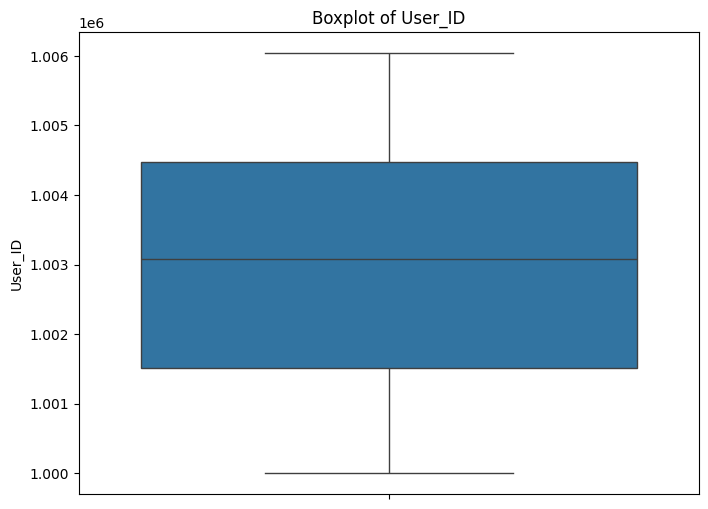

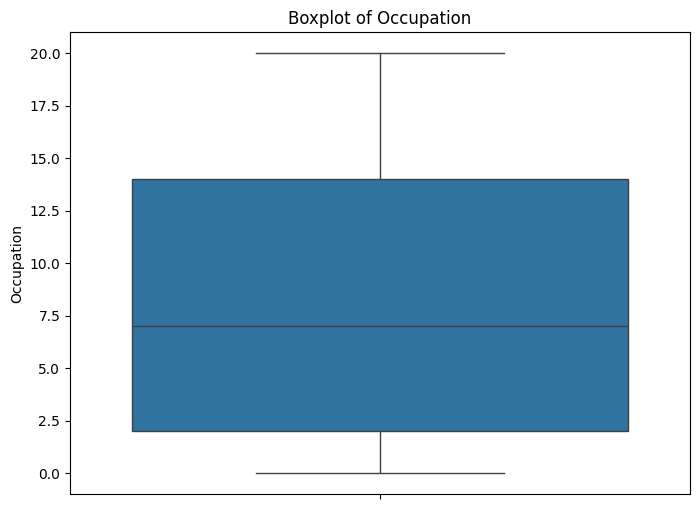

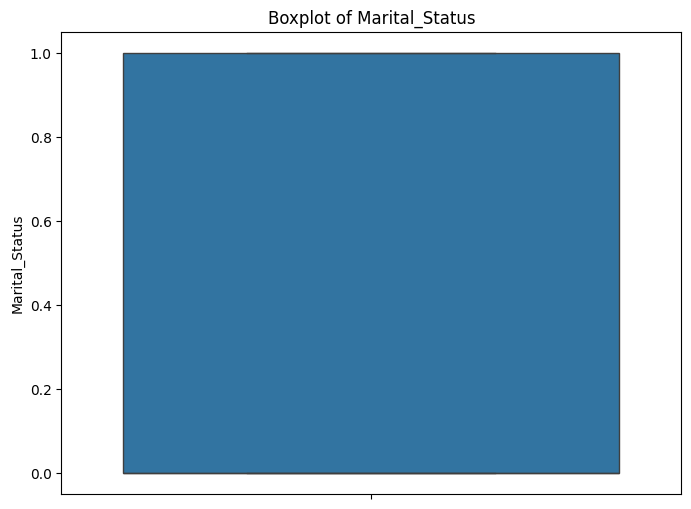

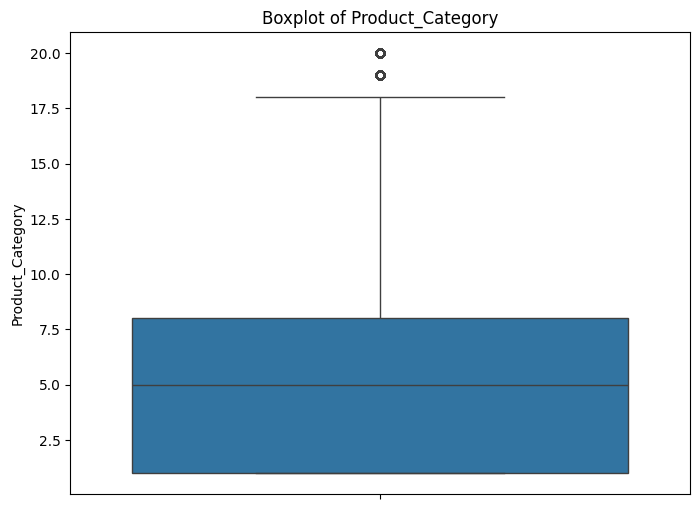

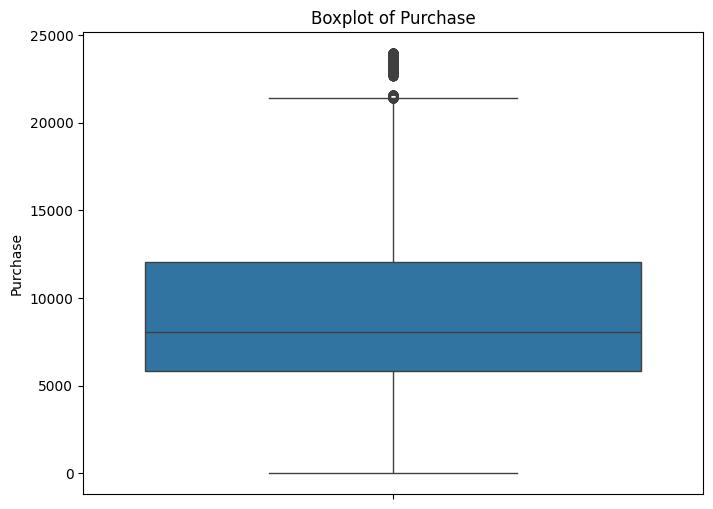

In [ ]:
for i in df1:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df1[i])
    plt.title(f'Boxplot of {i}')
    plt.ylabel(i)
    plt.show()


# Insights
#Median purchase price is 7000-8000 and maximum purchase price are above 23000
#therfore the outliers shows that on an estimation 50% of the people have ability to make the purchase of 7000-8000

# and here outliers are > Rs.23000 ,which denotes the highly potential customers range of purchase

In [ ]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
df["Gender"].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
df["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [ ]:
df["City_Category"].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [ ]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [ ]:
df["Product_ID"].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [ ]:
df["Gender"].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df["Marital_Status"].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [ ]:
df.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1000001  P00000142   F       0-17   10          A              2                           0               3                 13650       1
1004007  P00105342   M       36-45  12          A              1                           1               1                 11668       1
         P00115942   M       36-45  12          A              1                           1               8                 9800        1
         P00115142   M       36-45  12          A              1                           1               1                 11633       1
         P00114942   M       36-45  12          A              1                           1               1                 19148       1
                                                                                                                                        ..
1001973  P00265242   M       26-

###UNIVARIATE ANALYSIS

Marital_Status
0    324731
1    225337
Name: count, dtype: int64


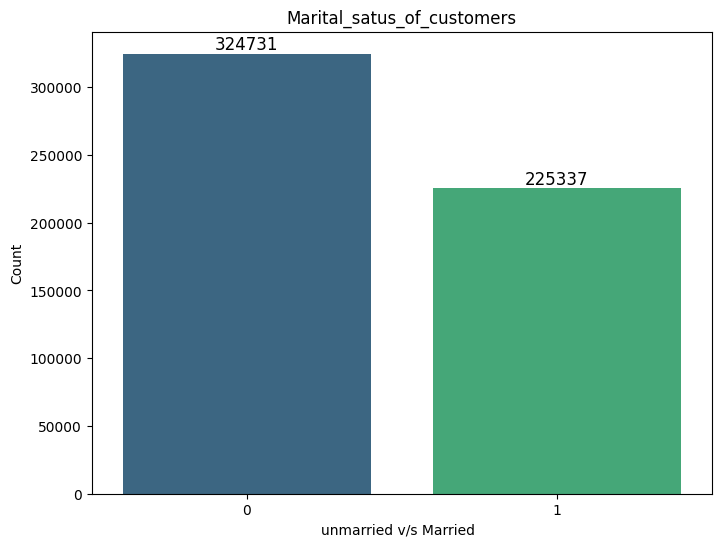

In [ ]:
gender_counts = df['Marital_Status'].value_counts()
print(gender_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
ax2 = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis', errorbar=None)

# Set plot title and labels
ax2.set_title('Marital_satus_of_customers')
ax2.set_xlabel('unmarried v/s Married  ')
ax2.set_ylabel('Count')

# Annotate the bars with the counts
for container in ax2.containers:
    ax2.bar_label(container, fontsize=12)

plt.show()

# More number of single's or umarried people are existing in the given data

Gender
M    414259
F    135809
Name: count, dtype: int64


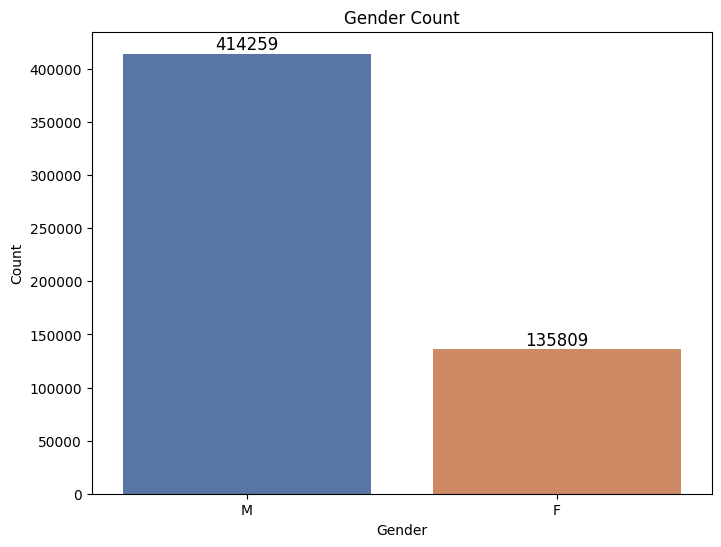

In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
ax2 = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='deep', errorbar=None)

# Set plot title and labels
ax2.set_title('Gender Count')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')

# Annotate the bars with the counts
for container in ax2.containers:
    ax2.bar_label(container, fontsize=12)

plt.show()

# Male population invovement and count is also more in the Black Friday sale

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


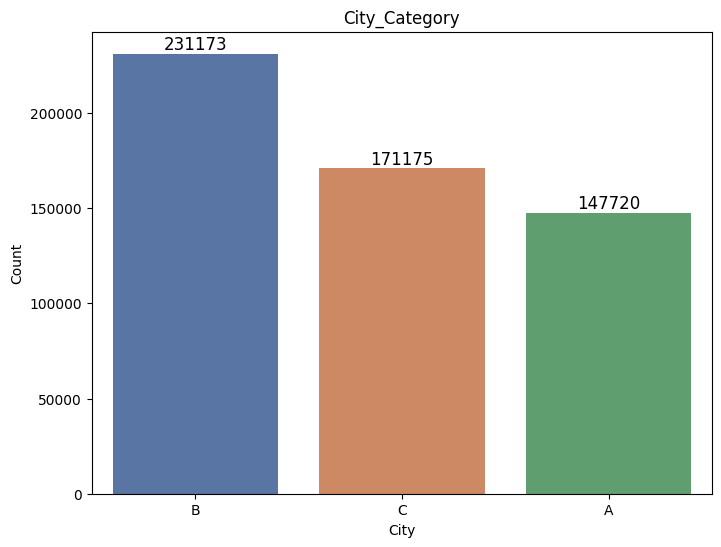

In [ ]:
gender_counts = df['City_Category'].value_counts()
print(gender_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
ax2 = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='deep', errorbar=None)

# Set plot title and labels
ax2.set_title('City_Category')
ax2.set_xlabel('City')
ax2.set_ylabel('Count')

# Annotate the bars with the counts
for container in ax2.containers:
    ax2.bar_label(container, fontsize=12)

plt.show()

#Maximum number of population reside in the city_category "B"

In [ ]:
cross_tab=pd.crosstab(index=df['Age'],columns=df['Gender'])

In [ ]:
cross_tab

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


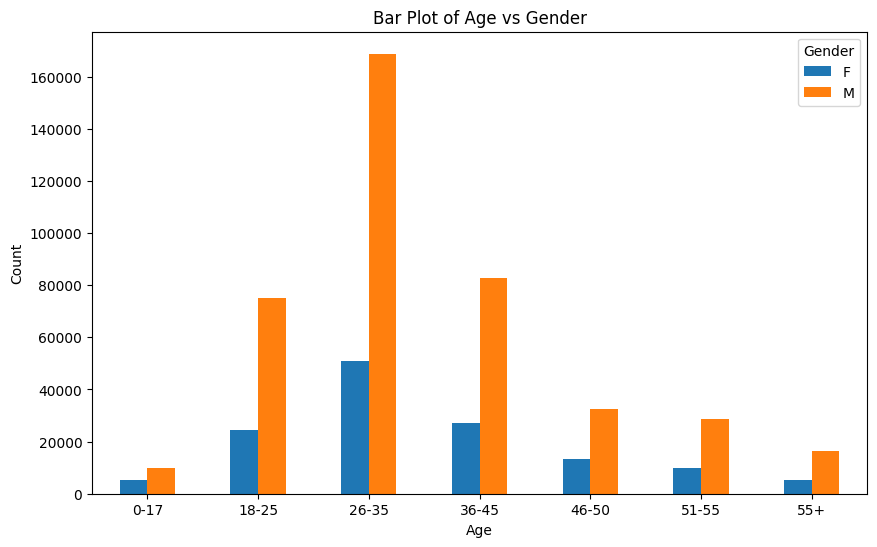

In [ ]:
cross_tab.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot of Age vs Gender')
plt.ylabel('Count')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

In [ ]:
catageory = pd.crosstab(index=df['City_Category'],columns=df['Age'])

In [ ]:
catageory

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,2544,27535,73745,26617,7607,6099,3573
B,5435,43247,91584,47598,20406,17741,5162
C,7123,28878,54258,35798,17688,14661,12769


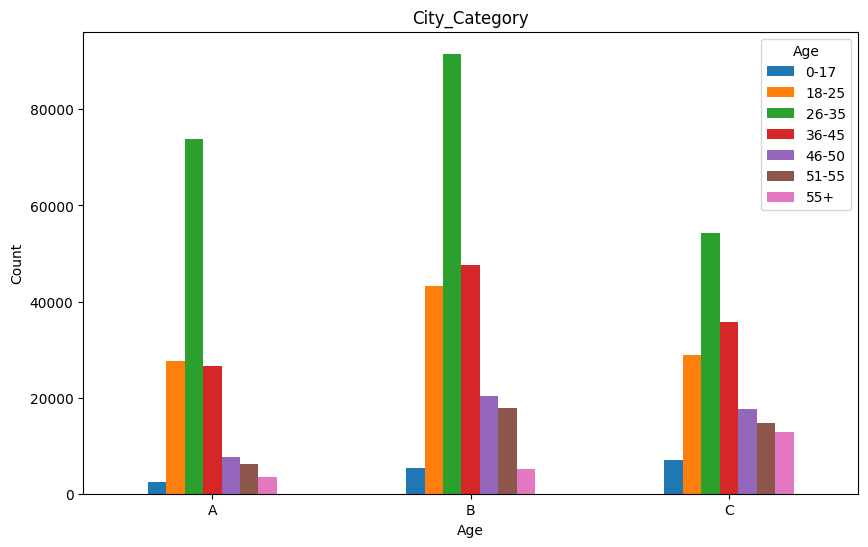

In [ ]:
catageory.plot(kind='bar', figsize=(10, 6))
plt.title('City_Category')
plt.ylabel('Count')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(title='Age')
plt.show()

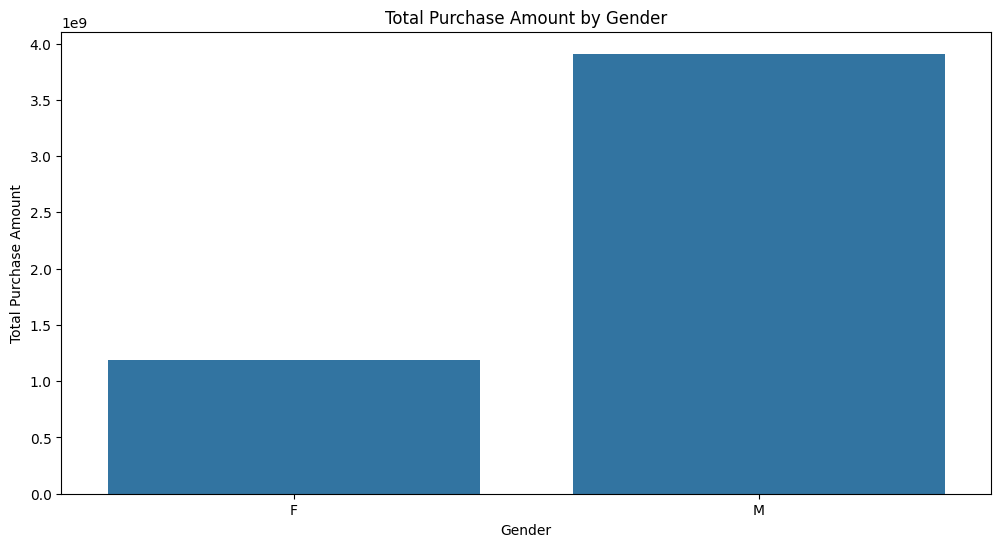

In [ ]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Remove rows with missing 'Purchase' values
df = df.dropna(subset=['Purchase'])

# Create bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Purchase', data=df, estimator=sum, ci=None)
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.show()

In [ ]:
cities=pd.crosstab(index=df['Gender'],columns=df['Stay_In_Current_City_Years'])

In [ ]:
cities

Stay_In_Current_City_Years,0,1,2,3,4+
Gender,,,,,
F,17063,51298,24332,24520,18596
M,57335,142523,77506,70765,66130


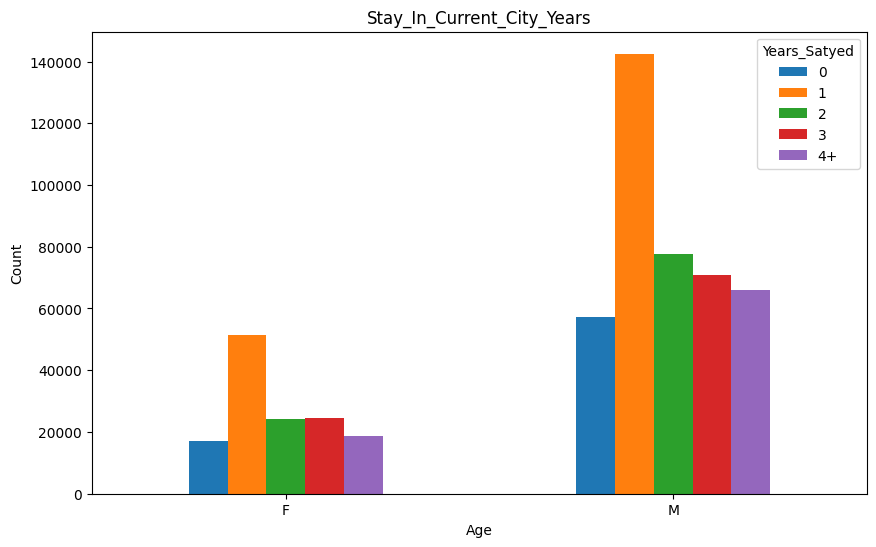

In [ ]:
cities.plot(kind='bar', figsize=(10, 6))
plt.title('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(title='Years_Satyed')
plt.show()

#Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.


In [ ]:
female_transactions = df[df['Gender'] == 'Female']
male_transactions = df[df['Gender'] == 'Male']

In [ ]:
average_female_transaction = female_transactions["Purchase"].mean()
average_male_transaction = male_transactions["Purchase"].mean()

In [ ]:
average_female_transaction

nan

In [ ]:
average_male_transaction

nan

In [ ]:
df = df.dropna(subset=['Purchase'])

In [ ]:
df["Purchase"].value_counts()

Purchase
7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: count, Length: 18105, dtype: int64

In [ ]:
cross_tab=pd.crosstab(index=df['Purchase'].mean(),columns=df['Gender'])

In [ ]:
cross_tab

Gender,F,M
row_0,,
9263.968713,135809,414259


In [ ]:
df[df['Gender'] == 'Female']['Purchase'].median()

nan

In [ ]:
missing_values = df[df['Gender'] == 'Female']['Purchase'].isnull().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [ ]:
print(df['Purchase'].dtype)

int64


In [ ]:
import pandas as pd

# Load the dataset
# df = pd.read_csv('transactions.csv')  # Uncomment and set your file path

# Check for missing values in 'Purchase' column for 'Female' gender
missing_values = df[df['Gender'] == 'Female']['Purchase'].isna().sum()
print(f"Number of missing values: {missing_values}")

# Convert 'Purchase' column to numeric, forcing non-numeric values to NaN
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Remove rows with missing 'Purchase' values for 'Female' gender
female_transactions = df[df['Gender'] == 'Female'].dropna(subset=['Purchase'])

# Calculate the median of the 'Purchase' column for 'Female' gender
female_median_purchase = female_transactions['Purchase'].median()
print(f"Median purchase amount for female customers: ${female_median_purchase:.2f}")


Number of missing values: 0
Median purchase amount for female customers: $nan


In [ ]:
female_median_purchase

nan

In [ ]:
female_transactions = df[df['Gender'] == 'Female']
male_transactions = df[df['Gender'] == 'Male']


In [ ]:
female_mean_purchase = female_transactions['Purchase'].mean()
male_mean_purchase = male_transactions['Purchase'].mean()

In [ ]:
female_mean_purchase

nan

In [ ]:
male_mean_purchase

nan

In [ ]:
female_transactions['Purchase']

Series([], Name: Purchase, dtype: int64)

In [ ]:
female_median_purchase = female_transactions['Purchase'].median()
female_median_purchase

nan

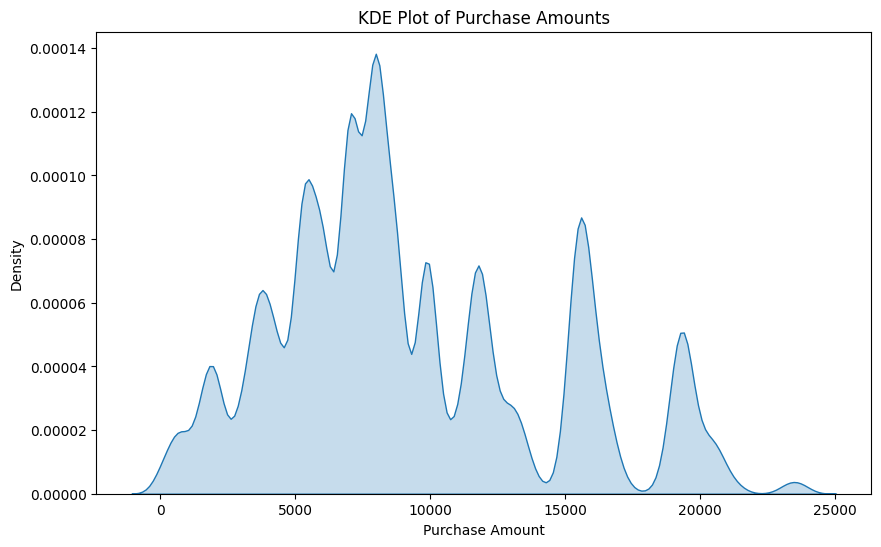

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Purchase'], shade=True)
plt.title('KDE Plot of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()


# calculation for the average purchase over gender

In [ ]:
female_customers = df[df["Gender"] == "F"]

In [ ]:
mean_female_purchase = female_customers["Purchase"].mean()

In [ ]:
mean_female_purchase

8734.565765155476

In [ ]:
male_customers = df[df["Gender"] == "M"]

In [ ]:
mean_male_purchase = male_customers["Purchase"].mean()

In [ ]:
mean_male_purchase

9437.526040472265

In [ ]:
purchase_amounts_female=female_customers["Purchase"].sum()
purchase_amounts_female

1186232642

In [ ]:
male_customers["Purchase"].sum()

3909580100

In [ ]:
female_customers.shape[0]

135809

In [ ]:
male_customers.shape[0]

414259

In [ ]:
FEMALE_PURCHASE_PER_TRANSACTIONS_TRACK=female_customers["Purchase"].sum()/female_customers.shape[0]

In [ ]:
FEMALE_PURCHASE_PER_TRANSACTIONS_TRACK

8734.565765155476

In [ ]:
MALE_PURCHASE_PER_TRANSACTIONS_TRACK = male_customers["Purchase"].sum()/male_customers.shape[0]

In [ ]:
MALE_PURCHASE_PER_TRANSACTIONS_TRACK

9437.526040472265

#INSIGHTS:
# 1)From the above analysis we can conclude saying that on an average males spending habits is more on Black Friday Sale

# 2)And after Tracking the per person transaction records Males track record of per transaction amount spent on purchase is more than the Female

##HYPOTHESIS TESTING

# Z-test

Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
n = df[df["Gender"] == "F"].shape[0]
mean = np.mean(purchase_amounts_female)
std_dev = np.std(purchase_amounts_female)

In [ ]:

n

135809

In [ ]:
mean

1186232642.0

In [ ]:
std_dev

0.0

In [ ]:
n/2

67904.5

In [ ]:
import numpy as np
from scipy import stats

# Sample data
sample_mean = np.mean(purchase_amounts_female)
sample_std_dev = np.std(purchase_amounts_female)
sample_size = df[df["Gender"] == "F"].shape[0]

# Z-score for 95% confidence
Z = 1.96

# Calculate the Margin of Error (ME)
sample_of_error = Z * (sample_std_dev / np.sqrt(sample_size))

# Calculate the Confidence Interval
confidence_interval = (sample_mean - sample_of_error, sample_mean + sample_of_error)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std_dev}")
print(f"Z-score: {Z}")
print(f"sample of Error: {sample_of_error}")
print(f"95% Confidence Interval: {confidence_interval}")


Sample Mean: 1186232642.0
Sample Standard Deviation: 0.0
Z-score: 1.96
sample of Error: 0.0
95% Confidence Interval: (1186232642.0, 1186232642.0)


#Interpretation

The confidence interval provides a range within which we can be 95% confident that the true population mean of spending lies. In this case, based on the sample of female customers, we can be 95% confident that the average spending of the entire population (both male and female customers) lies between 1186232642.0 and 1186232642.0

This interval is constructed under the assumption that the sample of female customers is representative of the entire population, and that the spending pattern of female customers is similar to that of the overall population.

If you have data for both male and female customers, you should combine them to calculate an overall mean and standard deviation for a more accurate estimate of the population mean.

# For both male and female customers,we can combine them to calculate an overall mean and standard deviation for a more accurate estimate of the population mean.

In [ ]:
# Sample data
purchase=df["Purchase"]
sample_mean = np.mean(purchase)
sample_std_dev = np.std(purchase)
sample_size = df["Gender"].shape[0]

# Z-score for 95% confidence
Z = 1.96

# Calculate the Margin of Error (ME)
sample_of_error = Z * (sample_std_dev / np.sqrt(sample_size))

# Calculate the Confidence Interval
confidence_interval = (sample_mean - sample_of_error, sample_mean + sample_of_error)

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std_dev}")
print(f"Z-score: {Z}")
print(f"sample of Error: {sample_of_error}")
print(f"95% Confidence Interval: {confidence_interval}")


Sample Mean: 9263.968712959126
Sample Standard Deviation: 5023.060827959928
Z-score: 1.96
sample of Error: 13.274443347282038
95% Confidence Interval: (9250.694269611844, 9277.243156306407)


#Interpretation

The confidence interval provides a range within which we can be 95% confident that the true population mean of spending lies. In this case, based on the sample of female and male customers, we can be 95% confident that the average spending of the entire population (both male and female customers) lies between 9250 and 9277

This interval is constructed under the assumption that the sample of whole population bith the make and female population  


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm


# Function to compute confidence interval
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)
    sample_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - sample_error, sample_mean + sample_error)

# Separate data by gender
female_data = df[df['Gender'] == 'F']['Purchase']
male_data = df[df['Gender'] == 'M']['Purchase']

# Sample sizes to test
sample_sizes = [10, 30, 50, 100]

# Calculate and print confidence intervals for different sample sizes
for size in sample_sizes:
    female_sample = female_data.sample(size, random_state=1)
    male_sample = male_data.sample(size, random_state=1)

    female_mean = female_sample.mean()
    female_std = female_sample.std()

    male_mean = male_sample.mean()
    male_std = male_sample.std()

    female_ci = compute_confidence_interval(female_mean, female_std, size)
    male_ci = compute_confidence_interval(male_mean, male_std, size)

    print(f"Sample size: {size}")
    print(f"Female Mean: {female_mean:.2f}, CI: {female_ci}")
    print(f"Male Mean: {male_mean:.2f}, CI: {male_ci}")
    print("-" * 50)


Sample size: 10
Female Mean: 7997.80, CI: (5141.284122817102, 10854.315877182898)
Male Mean: 10652.10, CI: (6900.231574783027, 14403.968425216974)
--------------------------------------------------
Sample size: 30
Female Mean: 8652.23, CI: (6949.149801884452, 10355.316864782215)
Male Mean: 10575.73, CI: (8697.872289319379, 12453.594377347288)
--------------------------------------------------
Sample size: 50
Female Mean: 9293.90, CI: (7962.326715073739, 10625.47328492626)
Male Mean: 10289.78, CI: (8701.217782474896, 11878.342217525105)
--------------------------------------------------
Sample size: 100
Female Mean: 8985.00, CI: (8079.311249161494, 9890.688750838506)
Male Mean: 9684.52, CI: (8650.355141943217, 10718.684858056784)
--------------------------------------------------


#Interpretation:

Sample Size Effect:   As the sample size increases, the Sample error decreases, resulting in narrower confidence intervals. This demonstrates the effect of larger sample sizes on the precision of the estimate.

Central Limit Theorem:  With larger sample sizes, the sampling distribution of the sample mean becomes approximately normal, justifying the use of Z-scores to calculate confidence intervals.

#Observations:

Small Sample Sizes:   With smaller sample sizes, the confidence interval is wider due to higher variability and less precise estimates.

Large Sample Sizes:   With larger sample sizes, the confidence interval becomes narrower, providing more precise estimates of the population mean.

By changing the sample size and observing the confidence intervals, we can see how the precision of the mean estimate improves with larger samples, demonstrating the application of the Central Limit Theorem.

#CLT Application in This Context

Large Sample Size Justification:
The CLT justifies the use of the normal distribution to approximate the sampling distribution of the sample mean, allowing the use of Z-scores for confidence interval calculations.

Effect of Sample Size:
 Smaller sample sizes result in wider confidence intervals (greater uncertainty), while larger sample sizes result in narrower intervals (greater precision).

#Observations:

1)As sample size increases, the margin of error decreases, leading to narrower confidence intervals.

2)For large enough sample sizes, the sampling distribution of the sample mean is approximately normal, allowing the use of Z-scores for constructing confidence intervals.

3)By applying the CLT, you can understand how sample size affects the precision of our estimate of the population mean and construct confidence intervals accordingly.

#Tweaking with the confidence intervels

In [ ]:
# Function to compute confidence interval
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    z_score = norm.ppf((1 + confidence_level) / 2)
    sample_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - sample_error, sample_mean + sample_error)

# Separate data by gender
female_data = df[df['Gender'] == 'F']['Purchase']
male_data = df[df['Gender'] == 'M']['Purchase']

# Sample sizes to test
sample_sizes = [10, 30, 50, 100]

# Confidence Intervala
confidence_levels = [0.90, 0.95, 0.99]


# Calculate and print confidence intervals for different sample sizes and different confidence intervals
for confidence_level in confidence_levels:
    print(f"Confidence Level: {confidence_level}")

    for size in sample_sizes:
        female_sample = female_data.sample(size, random_state=1)
        male_sample = male_data.sample(size, random_state=1)

        female_mean = female_sample.mean()
        female_std = female_sample.std()

        male_mean = male_sample.mean()
        male_std = male_sample.std()

        female_ci = compute_confidence_interval(female_mean, female_std, size,confidence_level)
        male_ci = compute_confidence_interval(male_mean, male_std, size,confidence_level)

        print(f"Sample size: {size}")
        print(f"Female Mean: {female_mean:.2f}, CI: {female_ci}")
        print(f"Male Mean: {male_mean:.2f}, CI: {male_ci}")
        print("-" * 50)


Confidence Level: 0.9
Sample size: 10
Female Mean: 7997.80, CI: (5600.536306335054, 10395.063693664946)
Male Mean: 10652.10, CI: (7503.43276134609, 13800.76723865391)
--------------------------------------------------
Sample size: 30
Female Mean: 8652.23, CI: (7222.960578424828, 10081.50608824184)
Male Mean: 10575.73, CI: (8999.78266611631, 12151.684000550356)
--------------------------------------------------
Sample size: 50
Female Mean: 9293.90, CI: (8176.408472329592, 10411.391527670408)
Male Mean: 10289.78, CI: (8956.616561413946, 11622.943438586055)
--------------------------------------------------
Sample size: 100
Female Mean: 8985.00, CI: (8224.922040171845, 9745.077959828155)
Male Mean: 9684.52, CI: (8816.621492140612, 10552.41850785939)
--------------------------------------------------
Confidence Level: 0.95
Sample size: 10
Female Mean: 7997.80, CI: (5141.284122817102, 10854.315877182898)
Male Mean: 10652.10, CI: (6900.231574783027, 14403.968425216974)
----------------------

In [ ]:
# Function to compute confidence interval
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    z_score = norm.ppf((1 + confidence_level) / 2)
    sample_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - sample_error, sample_mean + sample_error)

# Separate data by gender
Population_data = df['Purchase']


# Sample sizes to test
sample_sizes = [10, 30000, 500000]

# Confidence Intervala
confidence_levels = [0.90, 0.95, 0.99]


# Calculate and print confidence intervals for different sample sizes and different confidence intervals
for confidence_level in confidence_levels:
    print(f"Confidence Level: {confidence_level}")
    print("*"*50)

    for size in sample_sizes:
        population_sample = Population_data.sample(size, random_state=1)

        population_mean = Population_data.mean()
        population_std = Population_data.std()



        population_ci = compute_confidence_interval( population_mean,  population_std, size,confidence_level)


        print(f"Sample size: {size}")
        print(f"population_mean: { population_mean:.2f}, CI: {population_ci}")
        print("-" * 100)


Confidence Level: 0.9
**************************************************
Sample size: 10
population_mean: 9263.97, CI: (6651.229346169848, 11876.708079748403)
----------------------------------------------------------------------------------------------------
Sample size: 30000
population_mean: 9263.97, CI: (9216.26683669005, 9311.6705892282)
----------------------------------------------------------------------------------------------------
Sample size: 500000
population_mean: 9263.97, CI: (9252.284187295865, 9275.653238622386)
----------------------------------------------------------------------------------------------------
Confidence Level: 0.95
**************************************************
Sample size: 10
population_mean: 9263.97, CI: (6150.697734928172, 12377.239690990078)
----------------------------------------------------------------------------------------------------
Sample size: 30000
population_mean: 9263.97, CI: (9207.128421549334, 9320.809004368917)
---------------

# INTERPRETATION


1)Narrower Intervals with Larger Sample Sizes  :   Larger sample sizes provide more precise estimates of the population mean.

2)Wider Intervals with Higher Confidence Levels  :   Higher confidence levels provide more reliable intervals at the cost of precision.

3)By observing how the confidence intervals change with different sample sizes and confidence levels, We can better understand the reliability and precision of your estimates.

# Does Confidence intervals overlap ?

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm


# Function to compute confidence interval
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Separate data by gender
female_data = df[df['Gender'] == 'F']['Purchase']
male_data = df[df['Gender'] == 'M']['Purchase']

# Sample sizes to test
sample_sizes = [ 30, 500, 10000]
confidence_levels = [0.90, 0.95, 0.99]

# Calculate and print confidence intervals for different sample sizes and confidence levels
for size in sample_sizes:
    female_sample = female_data.sample(size, random_state=1)
    male_sample = male_data.sample(size, random_state=1)

    female_mean = female_sample.mean()
    female_std = female_sample.std()

    male_mean = male_sample.mean()
    male_std = male_sample.std()

    print(f"Sample size: {size}")
    for conf_level in confidence_levels:
        female_ci = compute_confidence_interval(female_mean, female_std, size, conf_level)
        male_ci = compute_confidence_interval(male_mean, male_std, size, conf_level)
        overlap = not (female_ci[1] < male_ci[0] or male_ci[1] < female_ci[0])
        print(f"Confidence Level: {conf_level*100}%")
        print(f"Female Mean: {female_mean:.2f}, CI: {female_ci}")
        print(f"Male Mean: {male_mean:.2f}, CI: {male_ci}")
        print(f"Do confidence intervals overlap? {'Yes' if overlap else 'No'}")
        print("-" * 80)


Sample size: 30
Confidence Level: 90.0%
Female Mean: 8652.23, CI: (7222.960578424828, 10081.50608824184)
Male Mean: 10575.73, CI: (8999.78266611631, 12151.684000550356)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Confidence Level: 95.0%
Female Mean: 8652.23, CI: (6949.149801884452, 10355.316864782215)
Male Mean: 10575.73, CI: (8697.872289319379, 12453.594377347288)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Confidence Level: 99.0%
Female Mean: 8652.23, CI: (6414.0021712811185, 10890.46449538555)
Male Mean: 10575.73, CI: (8107.805583987883, 13043.661082678784)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Sample size: 500
Confidence Level: 90.0%
Female Mean: 8893.11, CI: (8535.097800934149, 9251.11419906585)
Male Mean: 9543.35, CI: (9168.090647386161, 9918.605352613838)

#Conclusion
Overlapping Intervals: For all confidence levels taken and the Sample size of smaller, intervals may overlap, suggesting that there is no significant difference in average spending between male and female customers.

Non-Overlapping Intervals: For all confidence levels taken and the Sample size of larger, intervals are not overlaped, indicating a significant difference in average spending.

#Actionable Insights for Walmart

##Targeted Marketing Campaigns:

If male and female spending habits are significantly different, Walmart can tailor marketing campaigns to address the specific needs and preferences of each gender group.

##Product Assortment:

Adjust the product assortment in stores to better match the spending patterns observed in each gender group. For example, if females tend to spend more on certain product categories, increase the stock and variety of those items.

##Pricing Strategies:

Implement different pricing strategies if spending behaviors vary significantly. For example, offer gender-specific discounts or promotions to encourage higher spending.

##Customer Engagement:

Develop gender-specific engagement strategies. If female customers spend more, create loyalty programs or personalized shopping experiences to retain and attract more female customers.

#3Store Layout and Inventory Management:

Optimize store layout and inventory levels based on spending patterns to enhance the shopping experience and ensure the availability of popular items for each gender.

##By leveraging these insights, Walmart can enhance its overall strategy to better meet the needs of its customers and improve sales performance.

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df["Marital_Status"].unique()

array([0, 1])

In [ ]:
# Function to compute confidence interval
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Separate data by gender
Married_data = df[df['Marital_Status'] == 1]['Purchase']
Unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

# Sample sizes to test
sample_sizes = [ 30, 50000, 80000]
confidence_levels = [0.90, 0.95, 0.99]

# Calculate and print confidence intervals for different sample sizes and confidence levels
for size in sample_sizes:
    married_sample = Married_data.sample(size, random_state=1)
    unmarried_sample = Unmarried_data.sample(size, random_state=1)

    married_mean = married_sample.mean()
    married_std = married_sample.std()

    unmarried_mean = unmarried_sample.mean()
    unmarried_std = unmarried_sample.std()

    print(f"Sample size: {size}")
    for conf_level in confidence_levels:
        married_ci = compute_confidence_interval(married_mean, married_std, size, conf_level)
        unmarried_ci = compute_confidence_interval(unmarried_mean, unmarried_std, size, conf_level)
        overlap = not (married_ci[1] < unmarried_ci[0] or married_ci[1] < unmarried_ci[0])
        print(f"Confidence Level: {conf_level*100}%")
        print(f"Married Mean: {married_mean:.2f}, CI: {married_ci}")
        print(f"Unmarried Mean: {unmarried_mean:.2f}, CI: {unmarried_ci}")
        print(f"Do confidence intervals overlap? {'Yes' if overlap else 'No'}")
        print("-" * 80)


Sample size: 30
Confidence Level: 90.0%
Married Mean: 8970.50, CI: (7557.509260941608, 10383.490739058392)
Unmarried Mean: 10756.43, CI: (9585.953568593164, 11926.9130980735)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Confidence Level: 95.0%
Married Mean: 8970.50, CI: (7286.817687078434, 10654.182312921566)
Unmarried Mean: 10756.43, CI: (9361.720669583754, 12151.145997082911)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Confidence Level: 99.0%
Married Mean: 8970.50, CI: (6757.7663611683165, 11183.233638831683)
Unmarried Mean: 10756.43, CI: (8923.47018826821, 12589.396478398456)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Sample size: 50000
Confidence Level: 90.0%
Married Mean: 9263.41, CI: (9226.54102938674, 9300.27637061326)
Unmarried Mean: 9248.96, CI: (9212.1679816

# outcome of Analysis
The confidence intervals for average spending between married and unmarried customers  overlap, indicates no statistically significant difference in their spending patterns.


#Walmart can consider the following suggestions:


##Unified Marketing Campaigns:

Inclusive Promotions: Design promotions and discounts that appeal to both married and unmarried customers. Avoid targeting offers specifically based on marital status.

##Broad Appeal Advertising:
 Create advertisements that highlight the benefits and features of products in a way that resonates with all customers, regardless of their marital status.
Product Assortment:

##Standardized Inventory:
 Maintain a product assortment that caters to the common needs and preferences of both married and unmarried customers.

##Versatile Products:
 Stock versatile products that can be useful in both single-person households and family settings.

#Customer Experience Enhancement:

##Universal Store Layout:
 Ensure that the store layout is convenient and accessible to all customers. Consider universal design principles that cater to a wide range of shoppers.

##Customer Service Training:
Train staff to provide excellent service to all customers, regardless of their demographic characteristics.

#Loyalty Programs:

##General Rewards:
 Develop loyalty programs that reward general spending and frequent visits rather than focusing on specific customer segments. Offer points or discounts based on overall purchase behavior.

##Engagement Initiatives:
Implement engagement initiatives that encourage repeat visits and larger basket sizes across all customer groups.

#Promotions and Discounts:

##General Promotions:
Run promotions that can attract both married and unmarried customers. For example, seasonal sales, bulk purchase discounts, and limited-time offers.

##Cross-Selling Opportunities:
 Promote products that complement each other to increase the average transaction value. For instance, if someone buys kitchenware, suggest related items like utensils or small appliances.

##Feedback and Continuous Improvement:

Customer Surveys: Conduct surveys to gather feedback from both married and unmarried customers. Use this feedback to make informed decisions about product offerings, store layout, and services.

##Data Analysis:
Continuously analyze purchase data to detect any emerging trends or changes in spending patterns. Be ready to adapt strategies based on new insights.

#Online and In-Store Integration:

##Unified Online Experience:
Ensure that the online shopping experience is seamless and caters to all customers. Offer features like easy navigation, personalized recommendations, and efficient checkout processes.

##Consistent Messaging:
 Maintain consistent messaging and promotions across both online and in-store channels to provide a cohesive shopping experience.

#Conclusion
Since the average spending of married and unmarried customers is not significantly different, Walmart can adopt a unified approach to cater to all customers. By focusing on inclusive marketing strategies, versatile product assortments, and excellent customer service, Walmart can enhance the shopping experience for a broad customer base, leading to increased customer satisfaction and potentially higher sales.

Implementing these strategies can help Walmart make data-driven decisions that benefit all customers, ensuring that everyone feels valued and catered to, regardless of their marital status.









In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df["Age"]

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object

# calculating the Age influencing on the Walmart purchase or sales activity made on Balck friday

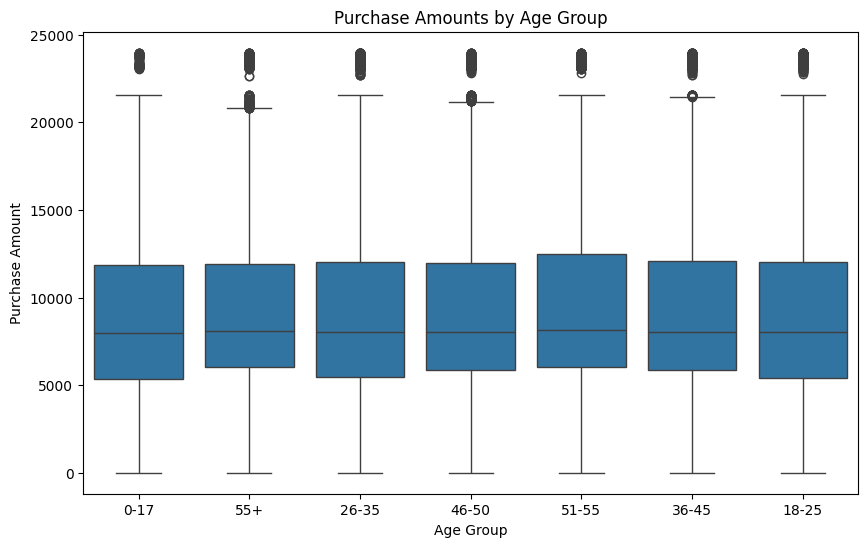

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
          count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to visualize the distribution of purchase amounts across age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Purchase Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

print("-" * 200)

# Descriptive statistics
grouped_stats = df.groupby('Age')['Purchase'].describe()
print(grouped_stats)

# STATISTICAL ANALYSIS ON THE AGE AND PURCHASE

#Performing ANOVA (Analysis of Variance) to see if there are significant differences between age groups.

In [ ]:
from scipy import stats

# ANOVA test
anova_result = stats.f_oneway(
    df[df['Age'] == '0-18']['Purchase'],
    df[df['Age'] == '19-25']['Purchase'],
    df[df['Age'] == '26-35']['Purchase'],
    df[df['Age'] == '36-45']['Purchase'],
    df[df['Age'] == '46-60']['Purchase'],
    df[df['Age'] == '60+']['Purchase']
)

print(f'ANOVA test result: F={anova_result.statistic}, p={anova_result.pvalue}')


ANOVA test result: F=nan, p=nan


In [ ]:
 df[df['Age'] == '0-18'].sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: object

In [ ]:
married_age_group_counts

Age
26-35    86291
36-45    43636
46-50    33011
51-55    27662
18-25    21116
55+      13621
Name: count, dtype: int64

In [ ]:
# Function to compute confidence interval
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Separate data by gender
Married_data = df[df['Marital_Status'] == 1]['Age_Labels']
Unmarried_data = df[df['Marital_Status'] == 0]['Age_Labels']

# Sample sizes to test
sample_sizes = [ 30, 50000, 80000]
confidence_levels = [0.90, 0.95, 0.99]

# Calculate and print confidence intervals for different sample sizes and confidence levels
for size in sample_sizes:
    married_sample = Married_data.sample(size, random_state=1)
    unmarried_sample = Unmarried_data.sample(size, random_state=1)

    married_mean = married_sample.mean()
    married_std = married_sample.std()

    unmarried_mean = unmarried_sample.mean()
    unmarried_std = unmarried_sample.std()

    print(f"Sample size: {size}")
    for conf_level in confidence_levels:
        married_ci = compute_confidence_interval(married_mean, married_std, size, conf_level)
        unmarried_ci = compute_confidence_interval(unmarried_mean, unmarried_std, size, conf_level)
        overlap = not (married_ci[1] < unmarried_ci[0] or married_ci[1] < unmarried_ci[0])
        print(f"Confidence Level: {conf_level*100}%")
        print(f"Married Mean: {married_mean:.2f}, CI: {married_ci}")
        print(f"Unmarried Mean: {unmarried_mean:.2f}, CI: {unmarried_ci}")
        print(f"Do confidence intervals overlap? {'Yes' if overlap else 'No'}")
        print("-" * 80)


Sample size: 30
Confidence Level: 90.0%
Married Mean: 4.03, CI: (3.67640342161314, 4.390263245053526)
Unmarried Mean: 2.83, CI: (2.5707798250504954, 3.0958868416161716)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Confidence Level: 95.0%
Married Mean: 4.03, CI: (3.6080251110611767, 4.45864155560549)
Unmarried Mean: 2.83, CI: (2.520481531922445, 3.146185134744222)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Confidence Level: 99.0%
Married Mean: 4.03, CI: (3.474383581904102, 4.592283084762565)
Unmarried Mean: 2.83, CI: (2.422176371216329, 3.244490295450338)
Do confidence intervals overlap? Yes
--------------------------------------------------------------------------------
Sample size: 50000
Confidence Level: 90.0%
Married Mean: 4.00, CI: (3.9936954562953595, 4.01414454370464)
Unmarried Mean: 3.16, CI: (3.1465943393684648, 3.164405660631535)
D

In [ ]:
age_labels = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}

# Map age bins to numerical labels using the map function
df['Age_Labels'] = df['Age'].map(age_labels)

# Alternatively, you can use the replace function
# df['Age_Labels'] = df['Age'].replace(age_labels)

# Print the DataFrame with numerical labels
print(df)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                               2               0                 3      8370 

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_Labels
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,6
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,3
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,3
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,7


In [ ]:
df["Age_Labels"].unique()

array([1, 7, 3, 5, 6, 4, 2])

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Separate data by age labels
AGE_0_17 = df[df['Age_Labels'] == 1]['Purchase']
AGE_18_25 = df[df['Age_Labels'] == 2]['Purchase']
AGE_26_35 = df[df['Age_Labels'] == 3]['Purchase']
AGE_36_45 = df[df['Age_Labels'] == 4]['Purchase']
AGE_46_50 = df[df['Age_Labels'] == 5]['Purchase']
AGE_51_55 = df[df['Age_Labels'] == 6]['Purchase']
AGE_55_PLUS = df[df['Age_Labels'] == 7]['Purchase']

# Sample sizes to test
sample_sizes = [30, 50000, 80000]
confidence_levels = [0.90, 0.95, 0.99]

# Calculate and print confidence intervals for different sample sizes and confidence levels
for size in sample_sizes:
    print(f"Sample Size: {size}")
    print("*"*50)
    for confidence_level in confidence_levels:
        print(f"Confidence Level: {confidence_level}")
        print("-"*50)
        for age_group_data, age_group_label in zip([AGE_0_17, AGE_18_25, AGE_26_35, AGE_36_45, AGE_46_50, AGE_51_55, AGE_55_PLUS],
                                                    ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']):
            sample_mean = age_group_data.mean()
            sample_std = age_group_data.std()
            confidence_interval = compute_confidence_interval(sample_mean, sample_std, size, confidence_level)
            print(f"Age Group: {age_group_label}, Confidence Interval: {confidence_interval}")
        print()


Sample Size: 30
**************************************************
Confidence Level: 0.9
--------------------------------------------------
Age Group: 0-17, Confidence Interval: (7398.557165641734, 10468.372115248214)
Age Group: 18-25, Confidence Interval: (7657.817383601494, 10681.509828921084)
Age Group: 26-35, Confidence Interval: (7747.990142748837, 10757.391122990939)
Age Group: 36-45, Confidence Interval: (7822.92741612439, 10839.773973711357)
Age Group: 46-50, Confidence Interval: (7716.93181972061, 10700.319575216045)
Age Group: 51-55, Confidence Interval: (8007.031655364861, 11062.58440655561)
Age Group: 55+, Confidence Interval: (7831.289663988853, 10841.271254909956)

Confidence Level: 0.95
--------------------------------------------------
Age Group: 0-17, Confidence Interval: (7104.509576649242, 10762.419704240707)
Age Group: 18-25, Confidence Interval: (7368.187719274329, 10971.139493248249)
Age Group: 26-35, Confidence Interval: (7459.7294113763255, 11045.65185436345)
Ag

In [ ]:
def compute_confidence_interval(sample_mean, sample_std, sample_size, confidence_level):
    z_score = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    return (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Separate data by age labels
AGE_0_17 = df[df['Age_Labels'] == 1]['Purchase']
AGE_18_25 = df[df['Age_Labels'] == 2]['Purchase']
AGE_26_35 = df[df['Age_Labels'] == 3]['Purchase']
AGE_36_45 = df[df['Age_Labels'] == 4]['Purchase']
AGE_46_50 = df[df['Age_Labels'] == 5]['Purchase']
AGE_51_55 = df[df['Age_Labels'] == 6]['Purchase']
AGE_55_PLUS = df[df['Age_Labels'] == 7]['Purchase']

age_groups = [AGE_0_17, AGE_18_25, AGE_26_35, AGE_36_45, AGE_46_50, AGE_51_55, AGE_55_PLUS]
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Sample sizes to test
sample_sizes = [30, 50000, 80000]
confidence_levels = [0.90, 0.95, 0.99]

# Calculate and print confidence intervals for different sample sizes and confidence levels
for size in sample_sizes:
    print(f"Sample Size: {size}")
    print("*"*50)
    for confidence_level in confidence_levels:
        print(f"Confidence Level: {confidence_level}")
        print("-"*50)
        for i in range(len(age_groups)):
            for j in range(i+1, len(age_groups)):
                age_group_data_1 = age_groups[i]
                age_group_data_2 = age_groups[j]
                age_group_label_1 = age_labels[i]
                age_group_label_2 = age_labels[j]

                sample_mean_1 = age_group_data_1.mean()
                sample_std_1 = age_group_data_1.std()
                confidence_interval_1 = compute_confidence_interval(sample_mean_1, sample_std_1, size, confidence_level)

                sample_mean_2 = age_group_data_2.mean()
                sample_std_2 = age_group_data_2.std()
                confidence_interval_2 = compute_confidence_interval(sample_mean_2, sample_std_2, size, confidence_level)

                if confidence_interval_1[1] < confidence_interval_2[0] or confidence_interval_2[1] < confidence_interval_1[0]:
                    overlap = "Not Overlapping"
                else:
                    overlap = "Overlapping"

                print(f"Age Group: {age_group_label_1} vs {age_group_label_2}, Overlap: {overlap}")

                print(f"Confidence Interval {age_group_label_1}: {confidence_interval_1}")
                print(f"Confidence Interval {age_group_label_2}: {confidence_interval_2}")
        print()


Sample Size: 30
**************************************************
Confidence Level: 0.9
--------------------------------------------------
Age Group: 0-17 vs 18-25, Overlap: Overlapping
Confidence Interval 0-17: (7398.557165641734, 10468.372115248214)
Confidence Interval 18-25: (7657.817383601494, 10681.509828921084)
Age Group: 0-17 vs 26-35, Overlap: Overlapping
Confidence Interval 0-17: (7398.557165641734, 10468.372115248214)
Confidence Interval 26-35: (7747.990142748837, 10757.391122990939)
Age Group: 0-17 vs 36-45, Overlap: Overlapping
Confidence Interval 0-17: (7398.557165641734, 10468.372115248214)
Confidence Interval 36-45: (7822.92741612439, 10839.773973711357)
Age Group: 0-17 vs 46-50, Overlap: Overlapping
Confidence Interval 0-17: (7398.557165641734, 10468.372115248214)
Confidence Interval 46-50: (7716.93181972061, 10700.319575216045)
Age Group: 0-17 vs 51-55, Overlap: Overlapping
Confidence Interval 0-17: (7398.557165641734, 10468.372115248214)
Confidence Interval 51-55: (8

##Based on the confidence intervals calculated for different age groups and sample sizes, we can make predictions about the certainty or uncertainty of these intervals. Here's a brief analysis:

##Certainty and Precision:

As the sample size increases, the width of the confidence intervals tends to decrease. This means that with larger sample sizes, we have more certainty and precision in our estimates of the population mean.
For smaller sample sizes (e.g., 30), the confidence intervals are wider, indicating more uncertainty about the true population mean.
##Impact of Confidence Level:

Higher confidence levels result in wider confidence intervals. This is because higher confidence levels require more certainty, leading to a larger margin of error.
For example, the confidence intervals at a 99% confidence level are wider compared to those at a 90% confidence level, indicating higher certainty but at the cost of precision.
##Variability Across Age Groups:

There may be variations in the width of confidence intervals across different age groups, especially for smaller sample sizes.
Age groups with larger variability in purchase behavior may have wider confidence intervals compared to age groups with less variability.
##Comparing Across Age Groups:

Comparing confidence intervals across different age groups allows us to assess whether there are significant differences in purchase behavior between age groups.
If the confidence intervals of two age groups overlap, it suggests that there may not be a significant difference in purchase behavior between those groups. Conversely, non-overlapping intervals indicate potential differences.
##Consideration of Practical Significance:

While statistical significance is important, it's also essential to consider practical significance. Even if there is a statistically significant difference in purchase behavior between age groups, it may not be practically significant if the difference is small.
##Future Actions:

Walmart can use these insights to tailor marketing strategies and product offerings to different age groups based on their purchasing behaviors.
They can also conduct further research or targeted campaigns to better understand and cater to the needs of specific age demographics.

##Overall, these predictions provide valuable insights into the confidence and uncertainty surrounding the estimates of purchase behavior across different age groups, guiding decision-making and strategy development for Walmart.









